In [1]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv('fbc/3VAC1.csv')
for i in range(len(df)):
    df['amplitudes'][i]= df['amplitudes'][i][1:len(df['amplitudes'][i])-2]
    df['amplitudes'][i] = np.array(df['amplitudes'][i].split(','))
    df['amplitudes'][i] =[float(i)/100 for i in df['amplitudes'][i]]
df

FileNotFoundError: [Errno 2] No such file or directory: 'fbc/3VAC1.csv'

In [ ]:
am = df['amplitudes']
am = am.apply(pd.Series)
subset = am

In [ ]:
df_t = subset.T
df_t


In [23]:
cols = list(df_t.columns)
for i in cols:
    temp = df_t[i].to_frame()
    new = "SMA100_"+str(i)
    df_t[new] = temp.rolling(100).mean()
df_t.dropna(inplace=True)
df_t

,0,1,2,3,4,5,6,7,8,9,...,SMA100_1036,SMA100_1037,SMA100_1038,SMA100_1039,SMA100_1040,SMA100_1041,SMA100_1042,SMA100_1043,SMA100_1044,SMA100_1045
99,-62.90,-67.55,-52.00,-54.70,-62.08,-12.73,-53.90,-60.80,-11.46,-55.59,...,-50.3540,-12.8380,-13.2251,-63.8923,-11.8922,-13.0769,-56.7870,-12.6868,-52.443,-52.3259
100,-66.24,-71.39,-51.30,-54.10,-66.61,-14.57,-52.30,-64.86,-11.62,-55.73,...,-50.4090,-12.8138,-13.2165,-63.9360,-11.8159,-13.0844,-56.8178,-12.6397,-52.528,-52.4069
101,-65.06,-66.74,-50.10,-53.10,-63.94,-12.93,-50.10,-62.18,-9.75,-54.74,...,-50.4600,-12.8062,-13.1961,-63.9644,-11.8560,-13.0789,-56.8488,-12.6176,-52.637,-52.5151
102,-61.69,-67.65,-50.00,-53.00,-67.57,-10.75,-49.90,-65.46,-13.28,-56.27,...,-50.5290,-12.8224,-13.1889,-63.9625,-11.8765,-13.1142,-56.8929,-12.6223,-52.731,-52.6250
103,-64.28,-70.81,-50.70,-54.80,-67.39,-13.32,-52.00,-62.43,-13.87,-55.37,...,-50.6040,-12.8028,-13.2087,-64.0135,-11.9181,-13.1259,-56.9859,-12.6631,-52.797,-52.6985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,-70.30,-73.89,-43.00,-46.00,-64.89,-56.41,-41.50,-67.61,-55.32,-57.69,...,-45.9910,-67.2017,-61.5132,-61.1741,-57.4307,-62.7205,-61.7751,-52.8197,-48.340,-57.2742
8700,-72.50,-71.91,-43.00,-46.30,-67.65,-55.72,-41.50,-66.87,-54.58,-57.26,...,-46.0040,-67.2012,-61.5194,-61.2084,-57.4077,-62.6899,-61.7759,-52.8364,-48.312,-57.2673
8701,-70.84,-71.09,-42.10,-45.10,-68.41,-56.27,-43.00,-64.46,-55.60,-54.08,...,-45.9800,-67.1783,-61.5056,-61.2384,-57.4402,-62.7184,-61.7963,-52.8265,-48.283,-57.2501
8702,-69.88,-68.43,-41.70,-44.80,-69.25,-59.17,-44.20,-63.86,-56.86,-53.45,...,-45.9600,-67.1521,-61.4995,-61.2616,-57.4778,-62.7673,-61.8129,-52.8411,-48.264,-57.2794


In [27]:
dfSMA100 = df_t.drop(columns = cols)

<AxesSubplot:>

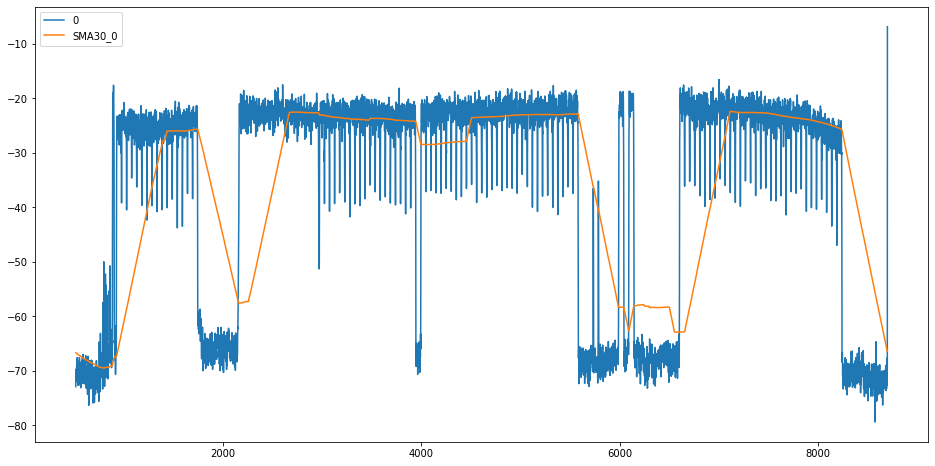

In [40]:
df_t = subset.T
df_t = df_t[0].to_frame()
df_t['SMA30_0'] = df_t[0].rolling(150).mean()
df_t.dropna(inplace=True)
#df_t
df_t[[0, 'SMA30_0']].plot(label='SMA30', 
                                  figsize=(16, 8))

In [39]:
df_t = subset.T
df_t = df_t[0].to_frame()
df_t['SMA30_0'] = df_t[0].rolling(150).mean()
df_t.dropna(inplace=True)
#df_t'
me = df_t['SMA30_0'].median()
me

#Detect low band, high band (ingress), short notch, positive tilt and negative tilt (this is hard)

-24.737333333333424

In [24]:
am =am.sub(am.loc[0], axis='columns')
am

,0,1,2,3,4,5,6,7,8,9,...,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-3.50,-5.94,-5.12,-4.80,-7.03,-4.16,-1.56,-4.33,-6.96,-5.64,...,4.60,3.59,0.97,-0.85,0.67,-3.59,0.59,-0.25,1.45,0.10
2,17.62,15.23,14.68,17.24,17.14,13.84,14.12,13.16,14.75,15.02,...,29.09,26.88,23.18,25.76,29.16,27.30,29.50,28.74,28.18,2.70
3,16.92,14.43,14.58,17.44,17.34,15.94,16.32,14.86,13.05,13.32,...,27.29,25.98,23.98,26.46,28.16,24.30,26.20,25.74,25.08,2.39
4,-4.16,-4.98,-3.02,1.89,-1.07,-2.22,-3.67,-4.13,-6.16,-4.78,...,4.13,2.30,-0.60,4.35,6.02,5.41,4.85,2.43,0.63,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,50.00,45.97,50.10,53.30,53.67,48.91,50.98,52.22,49.73,48.09,...,11.46,7.62,4.20,7.77,9.71,7.90,10.42,6.76,4.73,0.29
1042,8.51,6.93,7.47,11.76,9.79,8.90,10.05,7.53,6.66,7.28,...,10.03,9.43,4.60,7.86,10.59,7.86,10.48,10.80,6.81,0.91
1043,45.51,45.50,47.45,52.37,54.39,51.90,52.74,51.97,51.45,49.86,...,20.32,18.44,16.64,19.08,19.72,15.09,18.82,19.39,15.42,1.18
1044,15.42,12.93,12.48,15.14,15.04,12.24,12.62,11.26,11.05,11.32,...,22.19,21.28,19.38,21.66,25.66,24.30,26.40,24.24,22.88,2.17


In [26]:
am['mean'] = am.mean(axis=1)
am

,0,1,2,3,4,5,6,7,8,9,...,8695,8696,8697,8698,8699,8700,8701,8702,8703,mean
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,-3.50,-5.94,-5.12,-4.80,-7.03,-4.16,-1.56,-4.33,-6.96,-5.64,...,3.59,0.97,-0.85,0.67,-3.59,0.59,-0.25,1.45,0.10,-3.234628
2,17.62,15.23,14.68,17.24,17.14,13.84,14.12,13.16,14.75,15.02,...,26.88,23.18,25.76,29.16,27.30,29.50,28.74,28.18,2.70,16.554743
3,16.92,14.43,14.58,17.44,17.34,15.94,16.32,14.86,13.05,13.32,...,25.98,23.98,26.46,28.16,24.30,26.20,25.74,25.08,2.39,11.852398
4,-4.16,-4.98,-3.02,1.89,-1.07,-2.22,-3.67,-4.13,-6.16,-4.78,...,2.30,-0.60,4.35,6.02,5.41,4.85,2.43,0.63,0.12,3.349882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,50.00,45.97,50.10,53.30,53.67,48.91,50.98,52.22,49.73,48.09,...,7.62,4.20,7.77,9.71,7.90,10.42,6.76,4.73,0.29,7.745841
1042,8.51,6.93,7.47,11.76,9.79,8.90,10.05,7.53,6.66,7.28,...,9.43,4.60,7.86,10.59,7.86,10.48,10.80,6.81,0.91,5.238559
1043,45.51,45.50,47.45,52.37,54.39,51.90,52.74,51.97,51.45,49.86,...,18.44,16.64,19.08,19.72,15.09,18.82,19.39,15.42,1.18,17.619432
1044,15.42,12.93,12.48,15.14,15.04,12.24,12.62,11.26,11.05,11.32,...,21.28,19.38,21.66,25.66,24.30,26.40,24.24,22.88,2.17,12.780635


In [27]:
f = [df['device_id'],am]
data = pd.concat(f,axis=1)
data

,device_id,0,1,2,3,4,5,6,7,8,...,8695,8696,8697,8698,8699,8700,8701,8702,8703,mean
0,3c:04:61:fe:1e:81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,58:19:f8:2a:ce:a7,-3.50,-5.94,-5.12,-4.80,-7.03,-4.16,-1.56,-4.33,-6.96,...,3.59,0.97,-0.85,0.67,-3.59,0.59,-0.25,1.45,0.10,-3.234628
2,a8:97:cd:41:0e:f1,17.62,15.23,14.68,17.24,17.14,13.84,14.12,13.16,14.75,...,26.88,23.18,25.76,29.16,27.30,29.50,28.74,28.18,2.70,16.554743
3,b0:da:f9:3e:5d:c6,16.92,14.43,14.58,17.44,17.34,15.94,16.32,14.86,13.05,...,25.98,23.98,26.46,28.16,24.30,26.20,25.74,25.08,2.39,11.852398
4,d4:04:cd:d6:f3:5d,-4.16,-4.98,-3.02,1.89,-1.07,-2.22,-3.67,-4.13,-6.16,...,2.30,-0.60,4.35,6.02,5.41,4.85,2.43,0.63,0.12,3.349882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,98:52:4a:07:80:ff,50.00,45.97,50.10,53.30,53.67,48.91,50.98,52.22,49.73,...,7.62,4.20,7.77,9.71,7.90,10.42,6.76,4.73,0.29,7.745841
1042,98:f7:d7:b8:e6:f9,8.51,6.93,7.47,11.76,9.79,8.90,10.05,7.53,6.66,...,9.43,4.60,7.86,10.59,7.86,10.48,10.80,6.81,0.91,5.238559
1043,08:a7:c0:a3:f0:ba,45.51,45.50,47.45,52.37,54.39,51.90,52.74,51.97,51.45,...,18.44,16.64,19.08,19.72,15.09,18.82,19.39,15.42,1.18,17.619432
1044,a8:97:cd:40:37:a5,15.42,12.93,12.48,15.14,15.04,12.24,12.62,11.26,11.05,...,21.28,19.38,21.66,25.66,24.30,26.40,24.24,22.88,2.17,12.780635


In [29]:
data[abs(data['mean'])<5]

,device_id,0,1,2,3,4,5,6,7,8,...,8695,8696,8697,8698,8699,8700,8701,8702,8703,mean
0,3c:04:61:fe:1e:81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,58:19:f8:2a:ce:a7,-3.50,-5.94,-5.12,-4.80,-7.03,-4.16,-1.56,-4.33,-6.96,...,3.59,0.97,-0.85,0.67,-3.59,0.59,-0.25,1.45,0.10,-3.234628
4,d4:04:cd:d6:f3:5d,-4.16,-4.98,-3.02,1.89,-1.07,-2.22,-3.67,-4.13,-6.16,...,2.30,-0.60,4.35,6.02,5.41,4.85,2.43,0.63,0.12,3.349882
15,f8:5e:42:8c:cd:1d,46.14,46.36,48.34,52.13,50.09,51.98,51.66,47.23,46.75,...,1.72,-0.81,0.92,5.74,4.43,6.52,3.75,0.63,0.07,-0.110085
16,d4:b9:2f:47:39:6a,45.31,43.80,49.34,51.54,53.19,51.32,51.80,46.85,49.53,...,8.12,3.53,4.63,8.48,6.33,8.21,5.16,3.33,0.38,4.157379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,d4:b9:2f:5c:c5:23,48.38,43.86,49.05,50.66,49.33,50.06,49.33,48.88,49.29,...,3.93,3.30,4.49,7.16,6.44,7.98,5.72,5.73,0.36,4.015433
1029,48:1d:70:46:01:59,2.94,3.46,4.62,6.75,6.56,6.22,5.56,4.04,2.73,...,4.97,1.01,1.92,1.02,1.02,2.59,2.70,0.49,0.12,1.902856
1030,d4:3f:cb:e1:ca:35,-0.87,-3.23,-0.40,1.80,2.57,1.50,2.42,-0.60,-1.64,...,-0.76,-3.95,0.38,4.27,1.85,4.58,0.88,0.73,-0.13,4.090949
1037,80:d0:4a:77:6b:a0,47.27,45.83,49.86,50.97,50.66,53.80,52.23,49.38,50.60,...,2.43,-0.77,2.04,5.40,2.39,5.12,5.09,4.10,0.15,0.959900
